In [1]:
# 8 Queens puzzle using Genetic algorithm

import random
import matplotlib.pyplot as plt

In [2]:
def generate_population_chromosome(no_of_queens):
    return [random.randint(1, no_of_queens) for _ in range(no_of_queens)]

In [ ]:
generate_population_chromosome(8)

In [9]:
def fitness(chromosome):
    size = len(chromosome)
    horizontal_collisions = sum([chromosome.count(queen) - 1 for queen in chromosome]) // 2
    diagonal_collisions = 0
    for x in range(size):
        for y in range(x+1, size):
            if abs(x-y) == abs(chromosome[x] - chromosome[y]):
                diagonal_collisions += 1
    return max_fitness - (horizontal_collisions + diagonal_collisions)

In [11]:
def random_parent_selection(population, probabilities):
    population_probabilty = zip(population, probabilities)
    tot = sum(weight for chrom, weight in population_probabilty)
    r_num = random.uniform(0, tot)
    len_upto = 0
    for chrom, weight in zip(population, probabilities):
        if len_upto + weight >= r_num:
            return chrom
        len_upto += weight
    assert False, "Prohibited"

In [12]:
def crossover(p1, p2):
    parent_size = len(p1)
    crossover_point = random.randint(0, parent_size - 1)
    return p1[0:crossover_point] + p2[crossover_point:parent_size]


In [13]:
def mutate(child_chromosome):
    size = len(child_chromosome)
    crossover_point = random.randint(0, size - 1)
    mut = random.randint(1, size)
    child_chromosome[crossover_point] = mut
    return child_chromosome

In [14]:
def probability_cal(chromosome, fitness):
    return fitness(chromosome) / max_fitness


In [15]:
def print_chess_board(chess_board):
    for row in chess_board:
        print(" ".join(row))


In [16]:
def plot_graph(average_fitenss):
    plt.plot(average_fitenss)
    plt.xlabel(" Population Generation Number")
    plt.ylabel("Average Fitness")
    plt.legend(loc='best')
    image = "plot.png"
    plt.show()

In [17]:
def generate_ga_queen(population, fitness, mutation_probability):
    child_population = []
    probabilities = [probability_cal(c, fitness) for c in population]
    for i in range(len(population)):
        parent1 = random_parent_selection(population, probabilities)
        parent2 = random_parent_selection(population, probabilities)
        child = crossover(parent1, parent2)

        if random.random() < mutation_probability:
            child = mutate(child)

        child_population.append(child)
        if fitness(child) == max_fitness:
            break
    return child_population

In [18]:
def genetic_algorithm(no_of_queens, max_fitness, population_size, max_generations, mutation_probability):
    average_fitenss = []
    resultant_chromosome = []
    population = [generate_population_chromosome(no_of_queens) for _ in range(population_size)]

    for generation in range(max_generations):
        if max_fitness in [fitness(chromosome) for chromosome in population]:
            print(f"Solution found after {generation + 1} generations")
            break

        population = generate_ga_queen(population, fitness, mutation_probability)

        print(f"Max Fitness value for {generation+1} generation: {max([fitness(chromosome) for chromosome in population])}")
        avg = sum([fitness(chromosome) for chromosome in population]) / len(population)
        average_fitenss.append(avg)
    else:
        print("No solution found")

    print(f"population_size: {population_size}")
    print(f"Total number of Generations: {generation + 1}")
    for chromosome in population:
        if fitness(chromosome) == max_fitness:
            resultant_chromosome = chromosome
            print(f"Solution found: Chromosome = {str(chromosome)} and Fitness = {fitness(chromosome)}")

    chess_board = []
    for row in range(no_of_queens):
        chess_board.append(["*"] * no_of_queens)

    for pos in range(no_of_queens):
        chess_board[no_of_queens - resultant_chromosome[pos]][pos] = "Q"

    print("8-Queens puzzle board solution:")
    print_chess_board(chess_board)

    plot_graph(average_fitenss)

Max Fitness value for 1 generation: 27
Max Fitness value for 2 generation: 26
Max Fitness value for 3 generation: 26
Max Fitness value for 4 generation: 26
Max Fitness value for 5 generation: 26
Max Fitness value for 6 generation: 26
Max Fitness value for 7 generation: 26
Max Fitness value for 8 generation: 26
Max Fitness value for 9 generation: 26
Max Fitness value for 10 generation: 27
Max Fitness value for 11 generation: 26
Max Fitness value for 12 generation: 26
Max Fitness value for 13 generation: 26
Max Fitness value for 14 generation: 26
Max Fitness value for 15 generation: 26
Max Fitness value for 16 generation: 27
Max Fitness value for 17 generation: 27
Max Fitness value for 18 generation: 26
Max Fitness value for 19 generation: 26
Max Fitness value for 20 generation: 26
Max Fitness value for 21 generation: 27
Max Fitness value for 22 generation: 27
Max Fitness value for 23 generation: 26
Max Fitness value for 24 generation: 26
Max Fitness value for 25 generation: 26
Max Fitne

Max Fitness value for 104 generation: 28
Solution found after 105 generations
population_size: 1000
Total number of Generations: 105
Solution found: Chromosome = [1, 5, 8, 6, 3, 7, 2, 4] and Fitness = 28
8-Queens puzzle board solution:
* * Q * * * * *
* * * * * Q * *
* * * Q * * * *
* Q * * * * * *
* * * * * * * Q
* * * * Q * * *
* * * * * * Q *
Q * * * * * * *


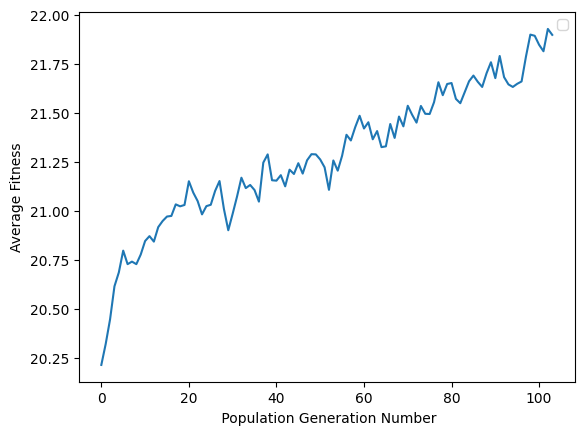

In [14]:
if __name__ == "__main__":
    no_of_queens = 8
    max_fitness = no_of_queens * (no_of_queens - 1) // 2
    population_size = 1000
    max_generations = 1000
    mutation_probability = 0.05
    genetic_algorithm(no_of_queens, max_fitness, population_size, max_generations, mutation_probability)

Max Fitness value for 1 generation: 26
Max Fitness value for 2 generation: 26
Max Fitness value for 3 generation: 26
Max Fitness value for 4 generation: 26
Max Fitness value for 5 generation: 26
Max Fitness value for 6 generation: 27
Max Fitness value for 7 generation: 26
Max Fitness value for 8 generation: 26
Max Fitness value for 9 generation: 26
Max Fitness value for 10 generation: 26
Max Fitness value for 11 generation: 27
Max Fitness value for 12 generation: 27
Max Fitness value for 13 generation: 27
Max Fitness value for 14 generation: 26
Max Fitness value for 15 generation: 27
Max Fitness value for 16 generation: 27
Max Fitness value for 17 generation: 27
Max Fitness value for 18 generation: 26
Max Fitness value for 19 generation: 26
Max Fitness value for 20 generation: 26
Max Fitness value for 21 generation: 26
Max Fitness value for 22 generation: 26
Max Fitness value for 23 generation: 26
Max Fitness value for 24 generation: 27
Max Fitness value for 25 generation: 26
Max Fitne

Max Fitness value for 83 generation: 28
Solution found after 84 generations
population_size: 500
Total number of Generations: 84
Solution found: Chromosome = [5, 2, 6, 1, 7, 4, 8, 3] and Fitness = 28
8-Queens puzzle board solution:
* * * * * * Q *
* * * * Q * * *
* * Q * * * * *
Q * * * * * * *
* * * * * Q * *
* * * * * * * Q
* Q * * * * * *
* * * Q * * * *


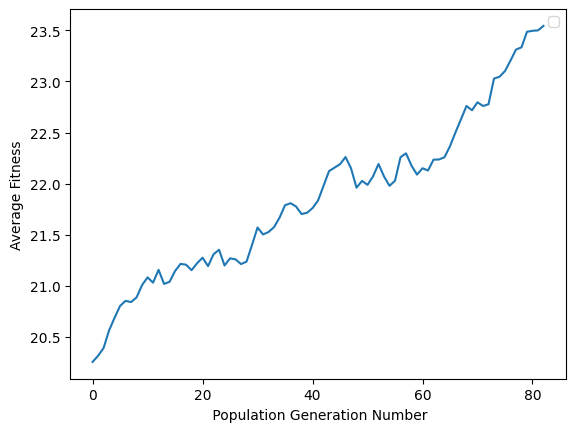

In [19]:

if __name__ == "__main__":
    no_of_queens = 8
    max_fitness = no_of_queens * (no_of_queens - 1) // 2
    population_size = 500
    max_generations = 1000
    mutation_probability = 0.05
    genetic_algorithm(no_of_queens, max_fitness, population_size, max_generations, mutation_probability)

Max Fitness value for 1 generation: 24
Max Fitness value for 2 generation: 25
Max Fitness value for 3 generation: 25
Max Fitness value for 4 generation: 25
Max Fitness value for 5 generation: 25
Max Fitness value for 6 generation: 25
Max Fitness value for 7 generation: 26
Max Fitness value for 8 generation: 25
Max Fitness value for 9 generation: 26
Max Fitness value for 10 generation: 25
Max Fitness value for 11 generation: 27
Max Fitness value for 12 generation: 26
Max Fitness value for 13 generation: 26
Max Fitness value for 14 generation: 26
Max Fitness value for 15 generation: 25
Max Fitness value for 16 generation: 25
Max Fitness value for 17 generation: 25
Max Fitness value for 18 generation: 25
Max Fitness value for 19 generation: 25
Max Fitness value for 20 generation: 25
Max Fitness value for 21 generation: 25
Max Fitness value for 22 generation: 26
Max Fitness value for 23 generation: 25
Max Fitness value for 24 generation: 25
Max Fitness value for 25 generation: 25
Max Fitne


Solution found after 847 generations
population_size: 100
Total number of Generations: 847
Solution found: Chromosome = [5, 2, 8, 1, 4, 7, 3, 6] and Fitness = 28
8-Queens puzzle board solution:
* * Q * * * * *
* * * * * Q * *
* * * * * * * Q
Q * * * * * * *
* * * * Q * * *
* * * * * * Q *
* Q * * * * * *
* * * Q * * * *


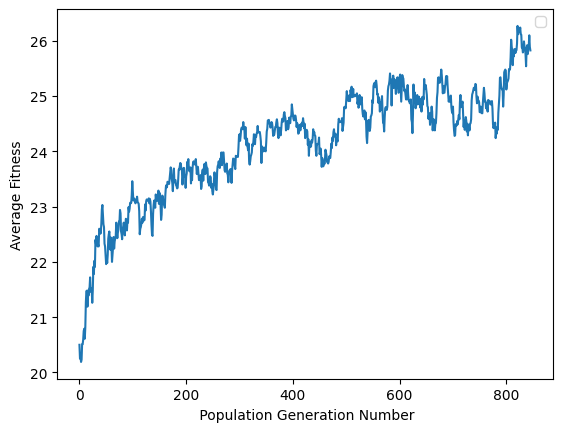

In [21]:
if __name__ == "__main__":
    no_of_queens = 8
    max_fitness = no_of_queens * (no_of_queens - 1) // 2
    population_size = 100
    max_generations = 1000
    mutation_probability = 0.05
    genetic_algorithm(no_of_queens, max_fitness, population_size, max_generations, mutation_probability)

In [23]:
if __name__ == "__main__":
    no_of_queens = 8
    max_fitness = no_of_queens * (no_of_queens - 1) // 2
    population_size = 10
    max_generations = 1000
    mutation_probability = 0.05
    genetic_algorithm(no_of_queens, max_fitness, population_size, max_generations, mutation_probability)

Max Fitness value for 1 generation: 22
Max Fitness value for 2 generation: 23
Max Fitness value for 3 generation: 23
Max Fitness value for 4 generation: 23
Max Fitness value for 5 generation: 23
Max Fitness value for 6 generation: 23
Max Fitness value for 7 generation: 23
Max Fitness value for 8 generation: 23
Max Fitness value for 9 generation: 23
Max Fitness value for 10 generation: 23
Max Fitness value for 11 generation: 22
Max Fitness value for 12 generation: 22
Max Fitness value for 13 generation: 22
Max Fitness value for 14 generation: 22
Max Fitness value for 15 generation: 23
Max Fitness value for 16 generation: 23
Max Fitness value for 17 generation: 22
Max Fitness value for 18 generation: 22
Max Fitness value for 19 generation: 22
Max Fitness value for 20 generation: 22
Max Fitness value for 21 generation: 22
Max Fitness value for 22 generation: 22
Max Fitness value for 23 generation: 22
Max Fitness value for 24 generation: 22
Max Fitness value for 25 generation: 22
Max Fitne

IndexError: list index out of range